### Here's a simple version of a perceptron using Python and NumPy. It will take two inputs and learn to act like the logical OR function.

In [1]:
from random import choice 
from numpy import array, dot, random

In [2]:
unit_step = lambda x: 0 if x < 0 else 1

#### The first two entries of the NumPy array in each tuple are the two input values. The second element of the tuple is the expected result. And the third entry of the array is a "dummy" input (also called the bias) which is needed to move the threshold (also known as the decision boundary) up or down as needed by the step function. Its value is always 1, so that its influence on the result can be controlled by its weight.

In [3]:
training_data = [ 
    (array([0,0,1]), 0), 
    (array([0,1,1]), 1), 
    (array([1,0,1]), 1), 
    (array([1,1,1]), 1), 
]

#### As you can see, this training sequence maps exactly to the definition of the OR function:

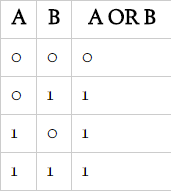

In [11]:
from IPython.display import Image
Image("fig1.png")

In [13]:
# Choose 3 random numbers between 0 and 1 as the initial weights:
w = random.rand(3) 
# Used to store the error values so that they can be plotted later on.
errors = [] 
# Controls the learning rate.
eta = 0.2 
# Specifies the number of learning iterations.
n = 100

In order to find the ideal values for the weights w, we try to reduce the error magnitude to zero. In this simple case n = 100 iterations are enough; for a bigger and possibly "noisier" set of input data much larger numbers should be used.

First we get a random input set from the training data. Then we calculate the dot product (sometimes also called scalar product or inner product) of the input and weight vectors. This is our (scalar) result, which we can compare to the expected value. If the expected value is bigger, we need to increase the weights, if it's smaller, we need to decrease them. This correction factor is calculated in the last line, where the error is multiplied with the learning rate (eta) and the input vector (x). It is then added to the weights vector, in order to improve the results in the next iteration.

In [7]:
for i in range(n): 
    x, expected = choice(training_data) 
    result = dot(w, x) 
    error = expected - unit_step(result) 
    errors.append(error) 
    w += eta * error * x

In [8]:
for x, _ in training_data: 
    result = dot(x, w) 
    print("{}: {} -> {}".format(x[:2], result, 
                                unit_step(result)))

[0 0]: -0.13904334999733814 -> 0
[0 1]: 0.8341488926571281 -> 1
[1 0]: 0.8423132788255797 -> 1
[1 1]: 1.8155055214800457 -> 1


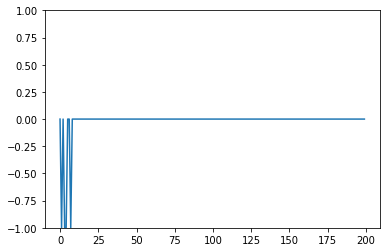

In [10]:
from pylab import plot, ylim 
%matplotlib inline
ylim([-1,1]) 
plot(errors)